In [48]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

In [15]:
import json
import pandas as pd
import matplotlib.cm
import sqlite3
from colour import Color
def flatten(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

In [10]:
metadata = []
with open('scraped_metadata3/MasterMetadata3.txt','r') as f:
    for line in f:
        metadata.append(json.loads(line.strip()))
for item in metadata:
    item['categories'] = ', '.join(item['categories'].keys())
df = pd.DataFrame.from_dict(metadata)

In [83]:
# all ratings for business
dbfilename = 'scraped_reviews/SimilaritiesUnique.db'
Ratings = []
biz = 'El Farolito'
with sqlite3.connect(dbfilename) as conn:
    cursor = conn.cursor()
    cursor.execute("""
    select *
    from {0}
    where (business1 is "{1}" or business2 is "{1}") and revcount > 100
    order by diffscore asc
    """.format('similarities',biz))
    temp = cursor.fetchall()
    #for tt in range(0, len(temp)):
    #    Ratings.append(temp[tt][0])
names = [i2 for i1 in temp for i2 in i1 if (not i2 == biz and type(i2) is unicode)]
scores = [item[4] for item in temp]
commonreviews = [item[2] for item in temp]
colorInd = [int(round(255*(score - min(scores))/(max(scores) - min(scores)))) for score in scores]
colors = [Color(rgb=matplotlib.cm.Reds(ind)[:-1][::-1]).hex for ind in colorInd]
names.insert(0,biz)
scores.insert(0,0)
colors.insert(0,Color('blue').hex)

In [84]:
sims = []
for item in zip(names, scores, colors, commonreviews):
    sims.append(item)

In [85]:
simsdf = pd.DataFrame(sims, columns=['BizName','Score','Color', 'CommonReviews'])

In [86]:
dfm = simsdf.merge(df,on='BizName')

In [44]:
gjl = []
for ind, item in dfm.iterrows():
    gj = dict()
    gj['type'] = 'Feature'
    gj['geometry'] = {'type':'Point', 'coordinates':[item['longitude'],item['latitude']]}
    desc = 'Rating Differential: '+str(item['Score'])+'\nCategories: '+item['categories']
    gj['properties'] = {'title':item['BizName'], 'description' : desc, 'marker-color' : item['Color'], 
                        "marker-size": "medium"}
    gjl.append(gj)

In [45]:
with open('ElFarolitoSimilarities.geojson','w') as f:
    for line in json.dumps(gjl,indent=2, separators=(',', ': ')):
        f.write(line.encode('utf-8'))

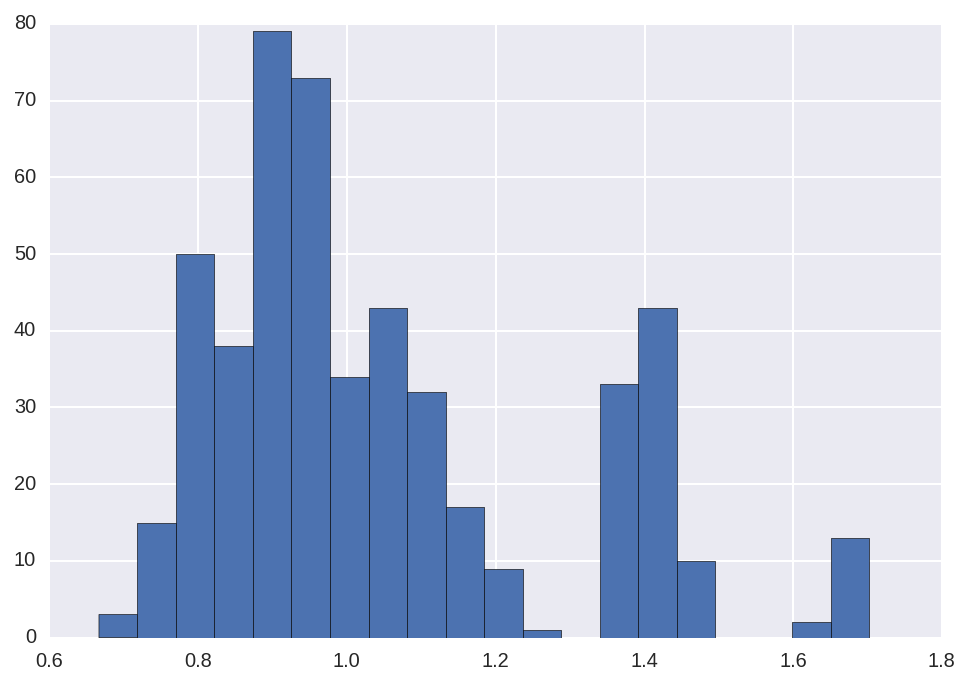

In [87]:
dfm[dfm['BizName'] != biz]['Score'].hist(bins=20)

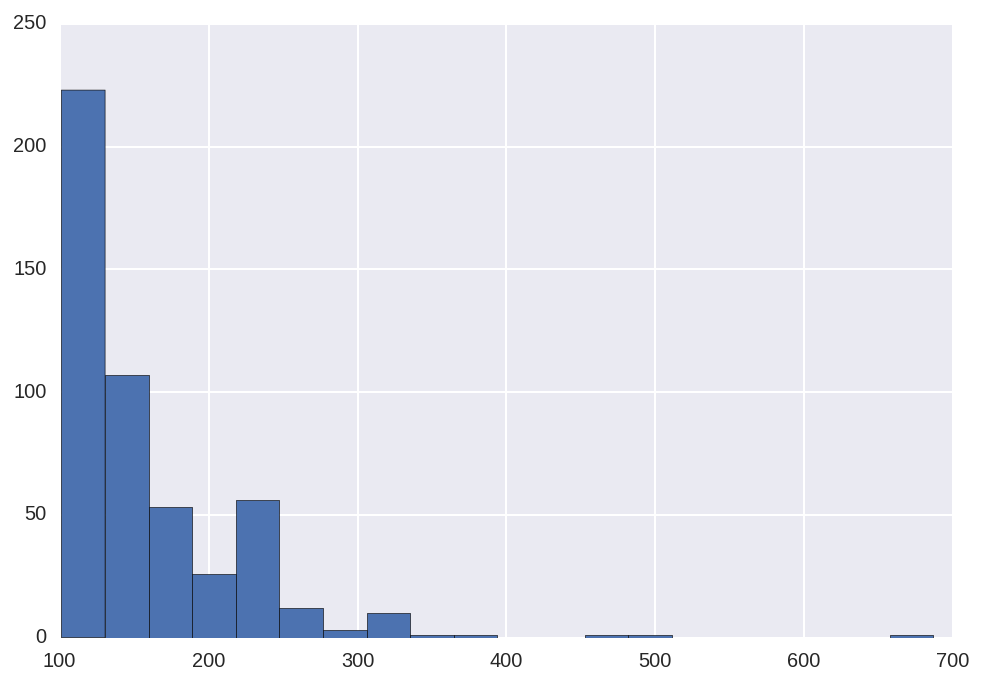

In [88]:
dfm[dfm['BizName'] != biz]['CommonReviews'].hist(bins=20)

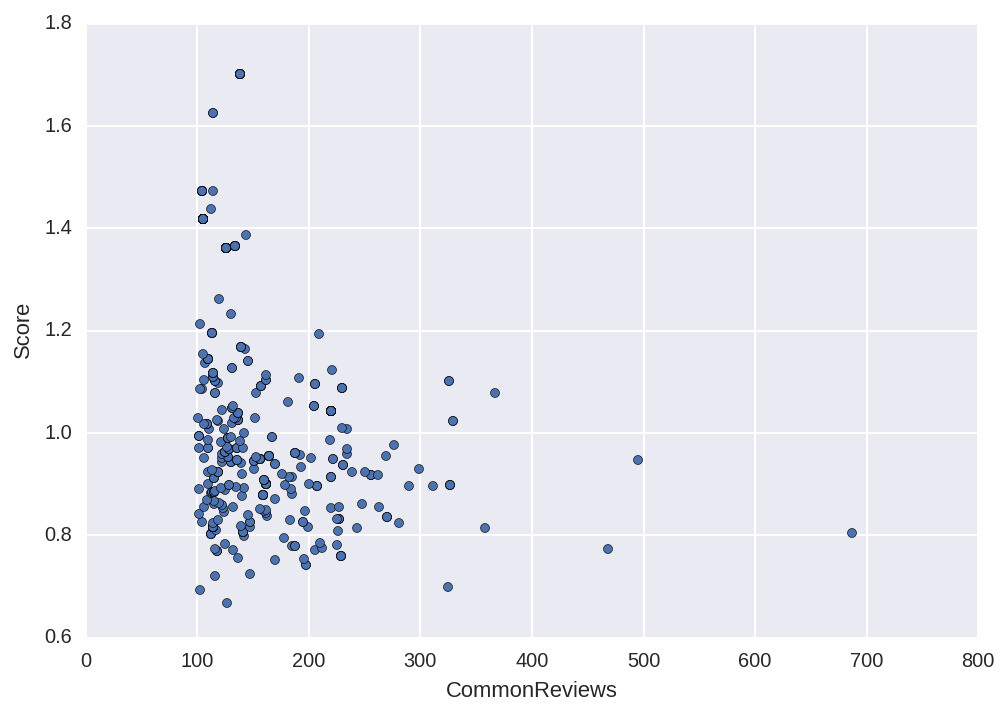

In [89]:
dfm[dfm['BizName'] != biz].plot(kind='scatter', x='CommonReviews', y='Score')

In [82]:
temp

[(u'El Farolito', u'The Sentinel', 132, 88.0, 0.666666666667),
 (u'El Farolito', u'Garaje', 127, 88.0, 0.692913385827),
 (u'El Farolito', u'Good Mong Kok Bakery', 103, 72.0, 0.699029126214),
 (u'El Farolito', u'Saigon Sandwich', 325, 234.0, 0.72),
 (u'El Farolito', u'Kitchen Story', 116, 84.0, 0.724137931034),
 (u'El Farolito', u'Top Dog', 147, 109.0, 0.741496598639),
 (u'El Farolito', u'Kokkari Estiatorio', 198, 149.0, 0.752525252525),
 (u'Angeline\u2019s Louisiana Kitchen',
  u'El Farolito',
  170,
  128.0,
  0.752941176471),
 (u'El Farolito',
  u'Little Lucca Sandwich Shop & Deli',
  196,
  148.0,
  0.755102040816),
 (u'El Farolito',
  u'Little Sheep Mongolian Hot Pot',
  137,
  104.0,
  0.759124087591),
 (u'Arizmendi Bakery', u'El Farolito', 229, 176.0, 0.768558951965),
 (u'El Farolito', u'Millbrae Pancake House', 118, 91.0, 0.771186440678),
 (u'El Farolito', u'HRD', 206, 159.0, 0.771844660194),
 (u'El Farolito', u'Thanh Long', 132, 102.0, 0.772727272727),
 (u'El Farolito', u'San T